# Clustering akses air bersih dan Sanitasi Layak di 34 Provinsi di Indonesia

In [1]:
# libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn import metrics

## Data
Data yang digunakan bersumber dari Badan Pusat Statistik yang dapat diakses [di sini](https://www.bps.go.id/id/statistics-table?subject=525)
Data terdiri dari 4 kolom yaitu:
* Provinsi : Menunjukkan 34 provinsi di indonesia
* Rumah Tangga memilki Sumber Air Minum Layak
* Persentase Rumah Tangga dengan Akses terhadap Sanitasi Layak
* Persentase Rumah Tangga yang Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air


In [2]:
# Read and Show Data
data = pd.read_csv('Data_SIC_Clustering.csv')
data.head()

,Provinsi,Sumber Air Minum Layak,Akses terhadap Sanitasi Layak,Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air
0,ACEH,89.70,77.48,68.04
1,SUMATERA UTARA,92.13,82.30,69.50
2,SUMATERA BARAT,85.23,69.27,81.33
3,RIAU,90.07,84.06,73.03
4,JAMBI,79.19,79.54,74.73


In [3]:
# Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Provinsi                                             34 non-null     object 
 1   Sumber Air Minum Layak                               34 non-null     float64
 2   Akses terhadap Sanitasi Layak                        34 non-null     float64
 3   Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air  34 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.2+ KB


In [4]:
# Describe
data.describe()

,Sumber Air Minum Layak,Akses terhadap Sanitasi Layak,Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air
count,34.000000,34.000000,34.000000
mean,87.640000,80.997059,78.829118
std,7.854854,9.784912,9.643497
min,65.390000,40.340000,40.910000
25%,81.577500,77.427500,75.085000
50%,89.830000,81.675000,80.305000
75%,93.250000,84.932500,85.797500
max,98.420000,96.210000,90.820000


Hasil dari data.describe() memberikan ringkasan statistik deskriptif untuk tiga kolom: "Sumber Air Minum Layak", "Akses terhadap Sanitasi Layak", dan "Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air". Setiap kolom memiliki 34 observasi. Rata-rata untuk masing-masing kolom adalah 87.64, 80.997, dan 78.83, dengan standar deviasi masing-masing 7.85, 9.78, dan 9.64, menunjukkan variasi dalam data. Nilai minimum dan maksimum untuk ketiga kolom menunjukkan rentang data yang cukup luas, dengan nilai minimum masing-masing 65.39, 40.34, dan 40.91, serta nilai maksimum 98.42, 96.21, dan 90.82. Persentil 25%, 50%, dan 75% memberikan gambaran lebih lanjut tentang distribusi data di setiap kolom.

In [5]:
# Drop Provinsi
data_num = data.drop(['Provinsi'], axis = 1)
data_num.head()

,Sumber Air Minum Layak,Akses terhadap Sanitasi Layak,Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air
0,89.70,77.48,68.04
1,92.13,82.30,69.50
2,85.23,69.27,81.33
3,90.07,84.06,73.03
4,79.19,79.54,74.73


## Exploratory Data Analysis : KDE Plot
KDE plot di pilih untuk menunjukkan sebaran distribusi dari data ketiga variabel yang digunakan. 

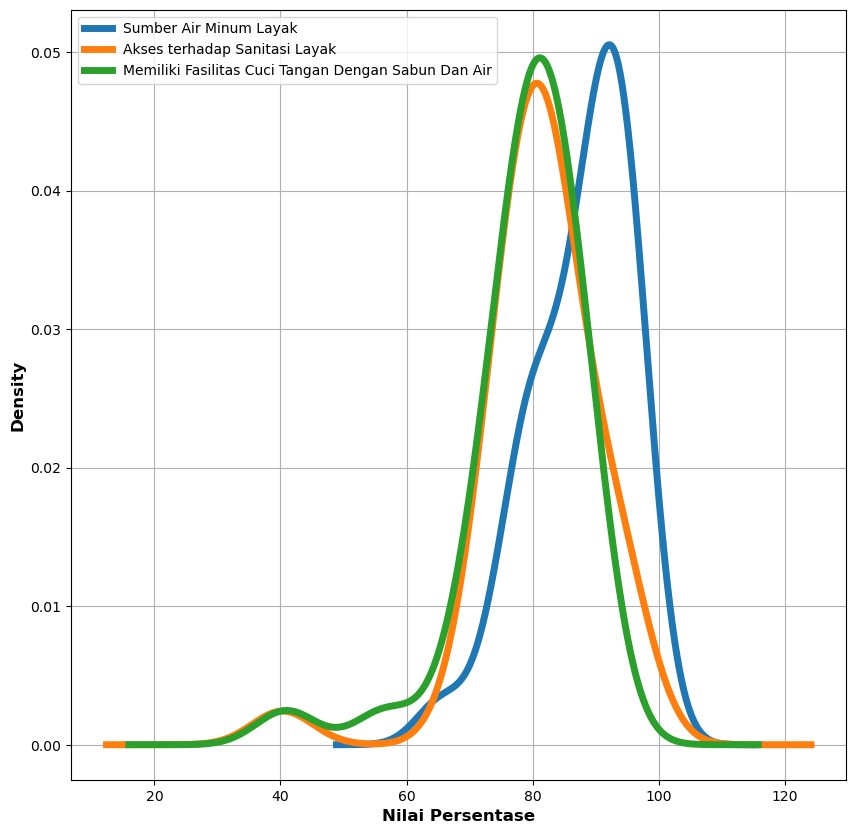

In [13]:
#kde plot
data_num.plot(kind='kde', sharex=False, sharey=False, figsize=(10,10), linewidth=5,fontsize=10)
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.xlabel('Nilai Persentase', fontsize=12, fontweight='bold')
plt.grid()

Dari Hasil KDE plot terlihat bahwa ketiga variabel membentuk "lonceng gaussian". Terdapat indikasi kecocokan gaussian apabila meninjau puncak yang ada pada kde plot. Dalam algoritma GMM setiap puncak dianggap sebagai representasi klaster.

## Modelling Gaussian Mixture Models

In [20]:
# Set seed

# Modelling
gmm = GaussianMixture(n_components = 3, random_state = 99) 
gmm.fit(data_num)

c:\Users\Mahendra\anaconda3\envs\S1Statistika\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=3, random_state=99)

In [21]:
# Save the cluster
clusters = gmm.predict(data_num)
clusters

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1], dtype=int64)

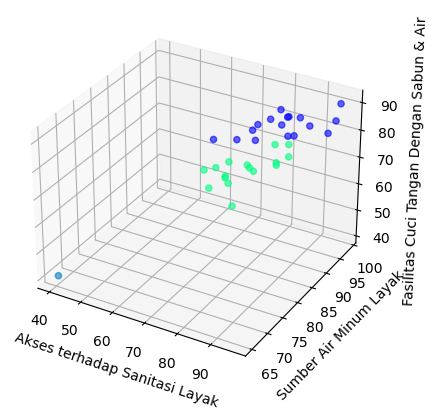

In [22]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
ax.scatter(data_num['Akses terhadap Sanitasi Layak'], data_num['Sumber Air Minum Layak'], data_num['Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air'], c=clusters, cmap=plt.cm.winter, alpha=0.6)

# Labeling the axes
ax.set_xlabel('Akses terhadap Sanitasi Layak')
ax.set_ylabel('Sumber Air Minum Layak')
ax.set_zlabel('Fasilitas Cuci Tangan Dengan Sabun & Air')

plt.show()

In [23]:
# Mean of each component
means = gmm.means_
print("Means:", means)

# Covariance of each component
covariances = gmm.covariances_
print("Covariances:", covariances)

# Weight of each component
weights = gmm.weights_
print("Weights:", weights)

# Precision of each component
precisions = gmm.precisions_
print("Precisions:", precisions)

Means: [[92.80535165 83.57337662 83.78817717]
 [65.39       40.34       40.91      ]
 [83.63990926 80.82996232 76.01274995]]
Covariances: [[[ 1.29358189e+01  1.91184921e+01  3.38648314e+00]
  [ 1.91184921e+01  5.63173803e+01  1.28728676e+01]
  [ 3.38648314e+00  1.28728676e+01  1.16393071e+01]]

 [[ 1.00000000e-06  1.31266455e-26  1.31266455e-26]
  [ 1.31266455e-26  1.00000000e-06  8.53231955e-27]
  [ 1.31266455e-26  8.53231955e-27  1.00000000e-06]]

 [[ 3.80651279e+01  7.70762848e+00 -2.18329619e+01]
  [ 7.70762848e+00  2.76188522e+01  2.23921031e+01]
  [-2.18329619e+01  2.23921031e+01  5.52258370e+01]]]
Weights: [0.4949955  0.02941176 0.47559273]
Precisions: [[[ 1.57871090e-01 -5.76748058e-02  1.78543577e-02]
  [-5.76748058e-02  4.48343855e-02 -3.28054193e-02]
  [ 1.78543577e-02 -3.28054193e-02  1.17003214e-01]]

 [[ 1.00000000e+06 -1.31266455e-14 -1.31266455e-14]
  [-1.31266455e-14  1.00000000e+06 -8.53231955e-15]
  [-1.31266455e-14 -8.53231955e-15  1.00000000e+06]]

 [[ 6.82978138e-

# Post-Analysis

In [24]:
# Merge the cluster with the original data
data['Cluster'] = clusters
data.head()

,Provinsi,Sumber Air Minum Layak,Akses terhadap Sanitasi Layak,Memiliki Fasilitas Cuci Tangan Dengan Sabun Dan Air,Cluster
0,ACEH,89.70,77.48,68.04,2
1,SUMATERA UTARA,92.13,82.30,69.50,2
2,SUMATERA BARAT,85.23,69.27,81.33,0
3,RIAU,90.07,84.06,73.03,2
4,JAMBI,79.19,79.54,74.73,2


In [30]:
# Print Provinces in Cluster 0
print('Cluster 0')
print(data[data['Cluster'] == 0]['Provinsi'])

# Print Provinces in Cluster 1
print('Cluster 1')
print(data[data['Cluster'] == 1]['Provinsi'])

# Print Provinces in Cluster 2
print('Cluster 2')
print(data[data['Cluster'] == 2]['Provinsi'])

Cluster 0
2        SUMATERA BARAT
9             KEP. RIAU
10          DKI JAKARTA
11           JAWA BARAT
12          JAWA TENGAH
13        DI YOGYAKARTA
14           JAWA TIMUR
15               BANTEN
16                 BALI
23     KALIMANTAN UTARA
24       SULAWESI UTARA
25      SULAWESI TENGAH
26     SULAWESI SELATAN
27    SULAWESI TENGGARA
28            GORONTALO
30               MALUKU
31         MALUKU UTARA
Name: Provinsi, dtype: object
Cluster 1
33    PAPUA
Name: Provinsi, dtype: object
Cluster 2
0                     ACEH
1           SUMATERA UTARA
3                     RIAU
4                    JAMBI
5         SUMATERA SELATAN
6                 BENGKULU
7                  LAMPUNG
8     KEP. BANGKA BELITUNG
17     NUSA TENGGARA BARAT
18     NUSA TENGGARA TIMUR
19        KALIMANTAN BARAT
20       KALIMANTAN TENGAH
21      KALIMANTAN SELATAN
22        KALIMANTAN TIMUR
29          SULAWESI BARAT
32             PAPUA BARAT
Name: Provinsi, dtype: object
